<h1 style="color: #FF8C00;">Libraries</h1>

In [594]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3 style="color: #FF6347;">Data Loading</h3>

In [596]:
df=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week4/tech-challenge/asset_price_data.csv")

In [597]:
df.sample(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
288,2020-02-10,251.690,73.322,33.463585,331.20,49.19
710,2021-09-22,252.827,96.093,36.003707,345.51,66.08


In [598]:
df["date"]=pd.to_datetime(df["date"])

In [599]:
df.shape

(783, 6)

In [600]:
df.isna().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [601]:
# df=df.dropna()

In [602]:
df.shape

(783, 6)

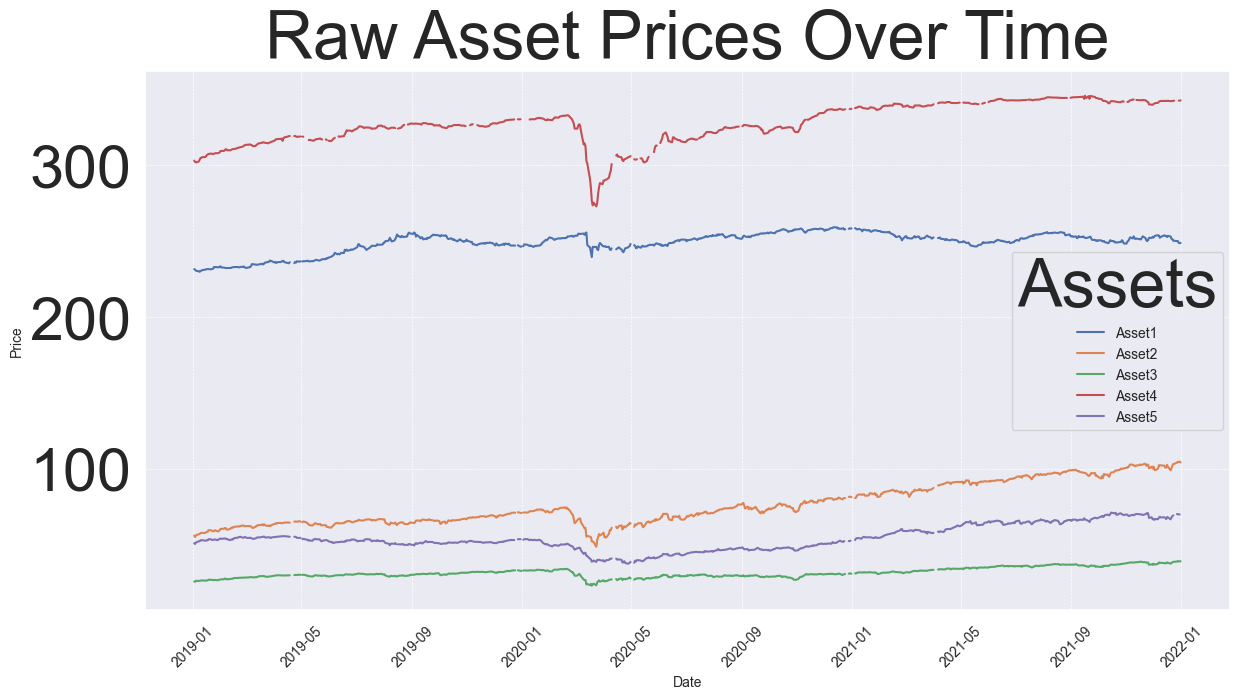

In [603]:
plt.figure(figsize=(14, 7))
for column in df.columns[1:]:  
    plt.plot(df['date'], df[column], label=column)
plt.title('Raw Asset Prices Over Time')
plt.xlabel('Date',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.xticks(rotation=45, fontsize=10) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title="Assets",fontsize=10)
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

daily return with pandas
https://medium.com/@tsubedy/ev-stock-daily-cumulative-returns-using-python-pandas-e918362ebadc#:~:text=Daily%20Return%20Percentages&text=Pandas%20cumprod()%20function%20is,is%20then%20multiplied%20by%20100.

In [607]:
daily_returns=df.iloc[:,1:].pct_change()*100

C:\Users\igara\AppData\Local\Temp\ipykernel_16204\1764139472.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns=df.iloc[:,1:].pct_change()*100


In [608]:
daily_returns.sample()

,Asset1,Asset2,Asset3,Asset4,Asset5
598,-0.201776,-0.28897,-0.07148,0.005856,0.182815


In [609]:
num=df.select_dtypes(include="number")

In [610]:
num_corr=round(num.corr(),3)

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

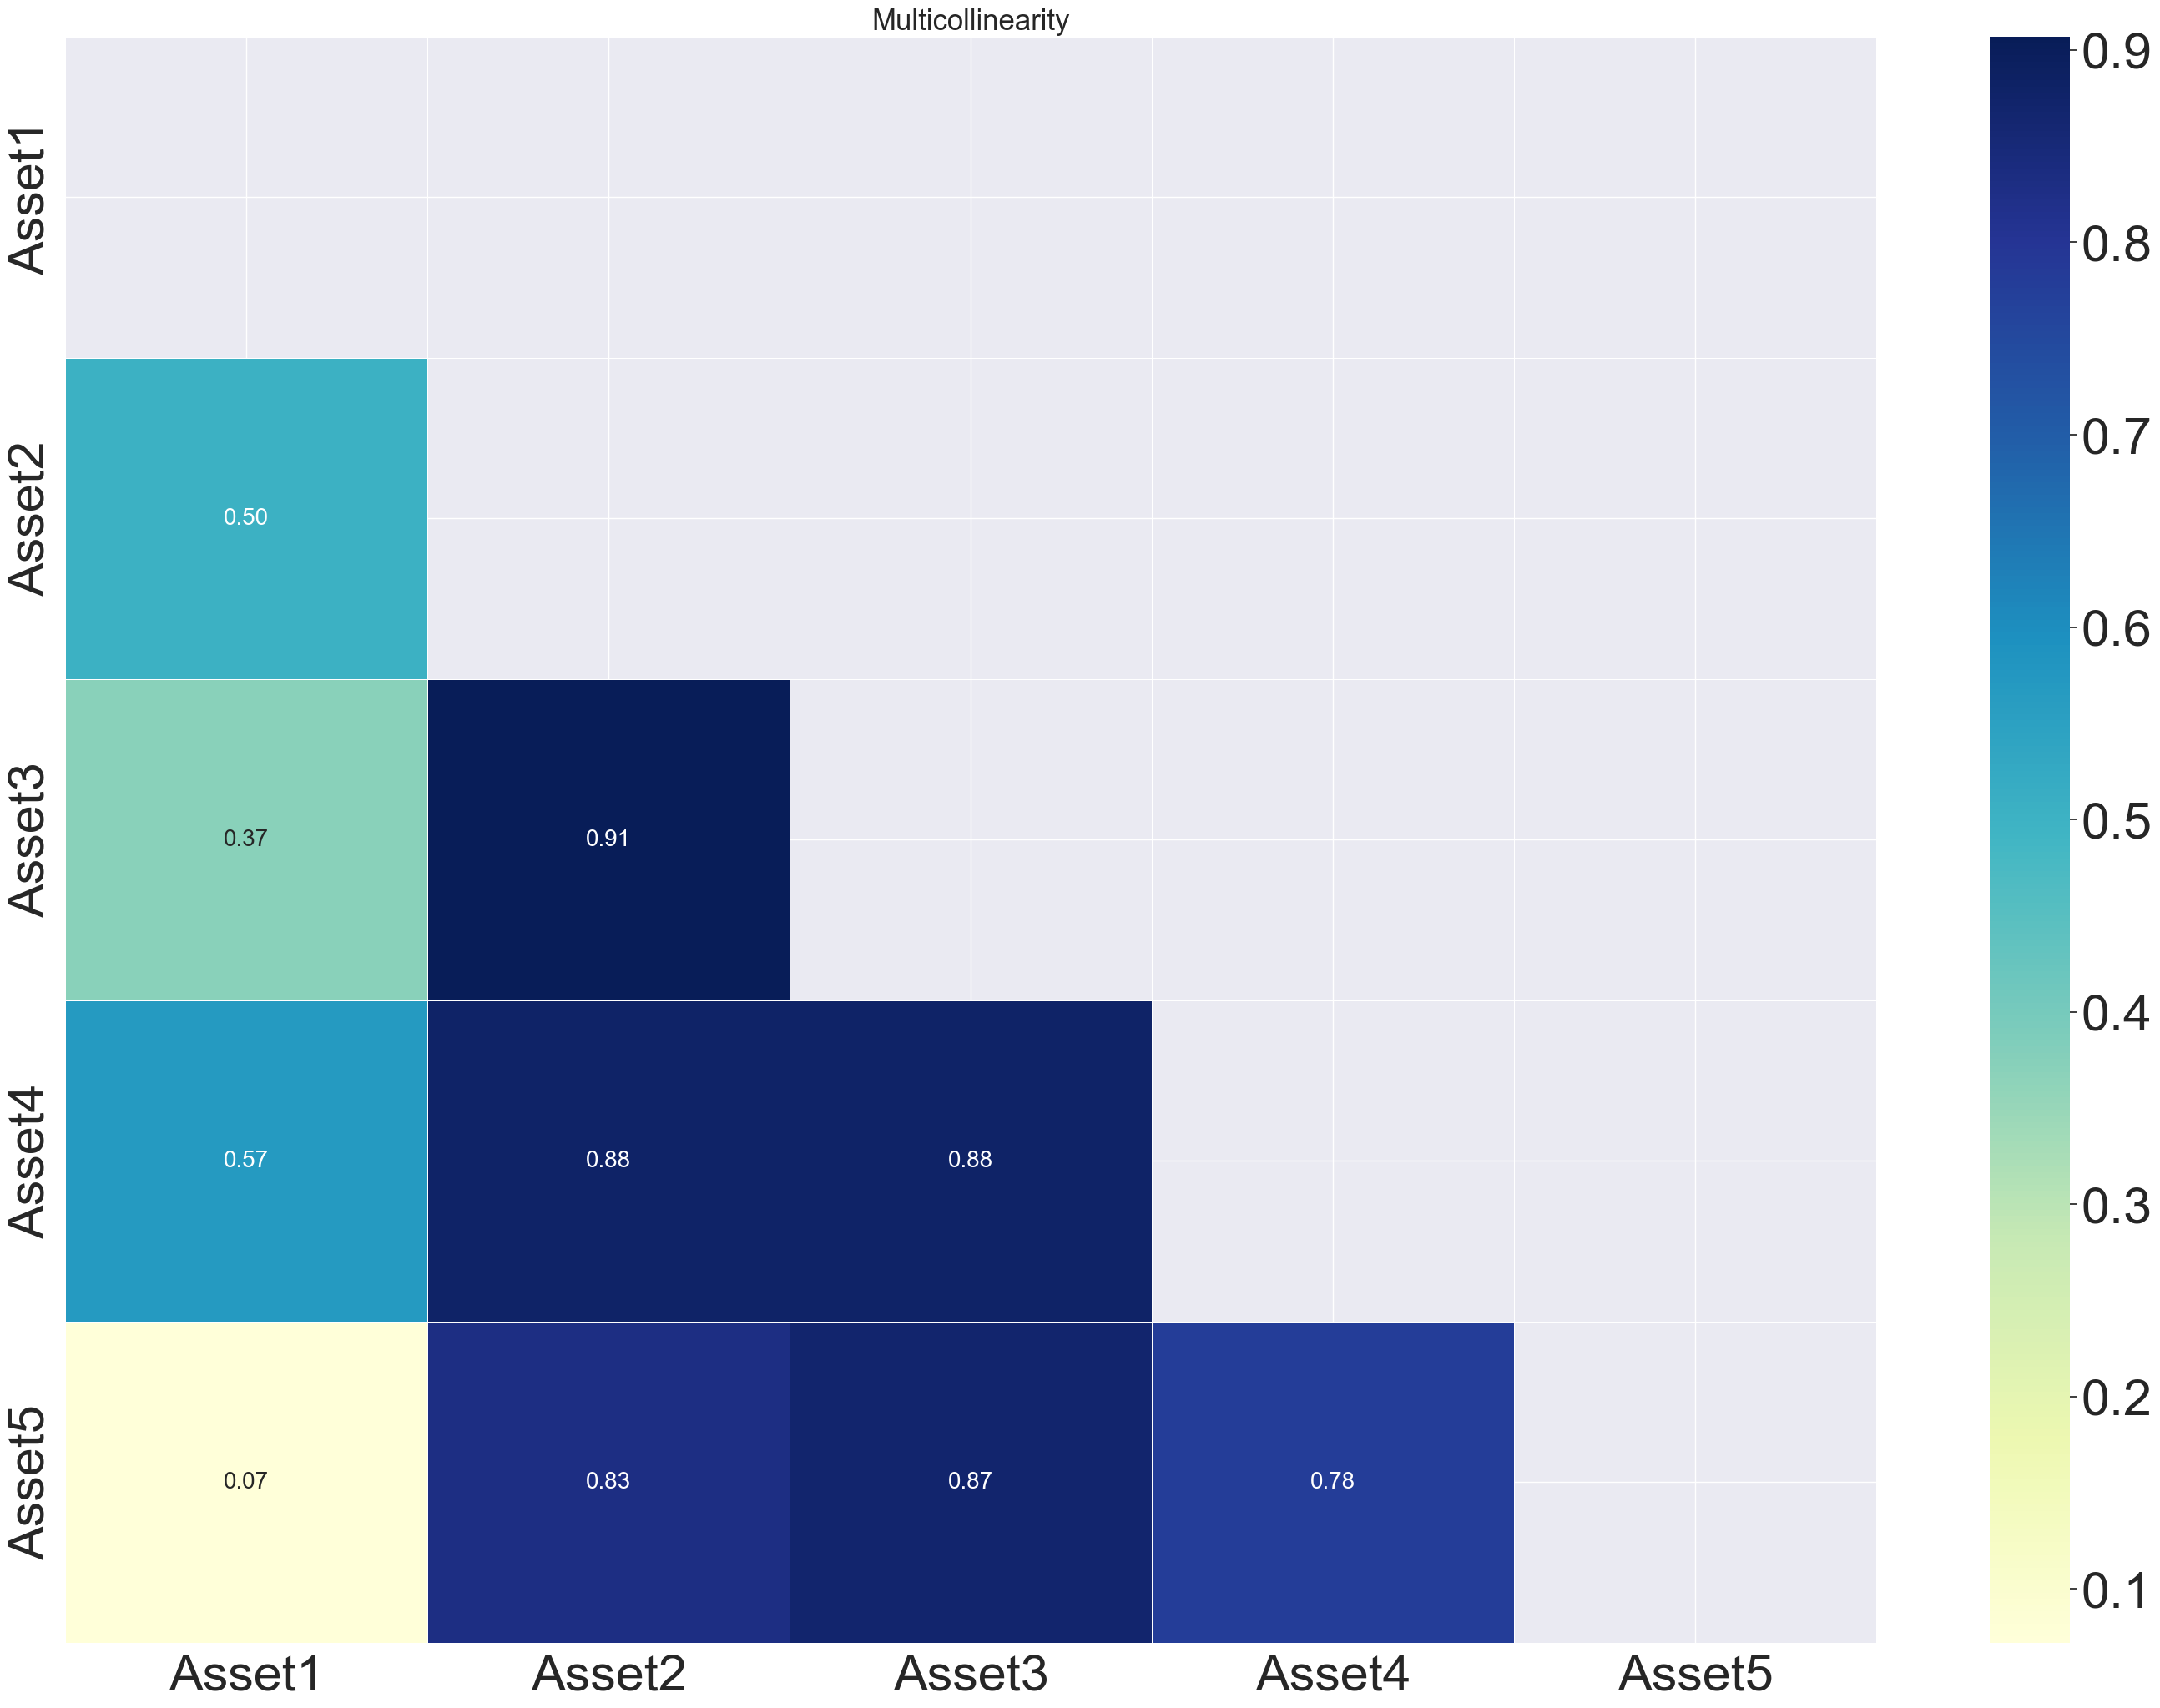

In [612]:
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(35, 25))
sns.set(font_scale=4) 

ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 20}, linewidths=.5, cmap="YlGnBu", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Multicollinearity", fontsize=25) 
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

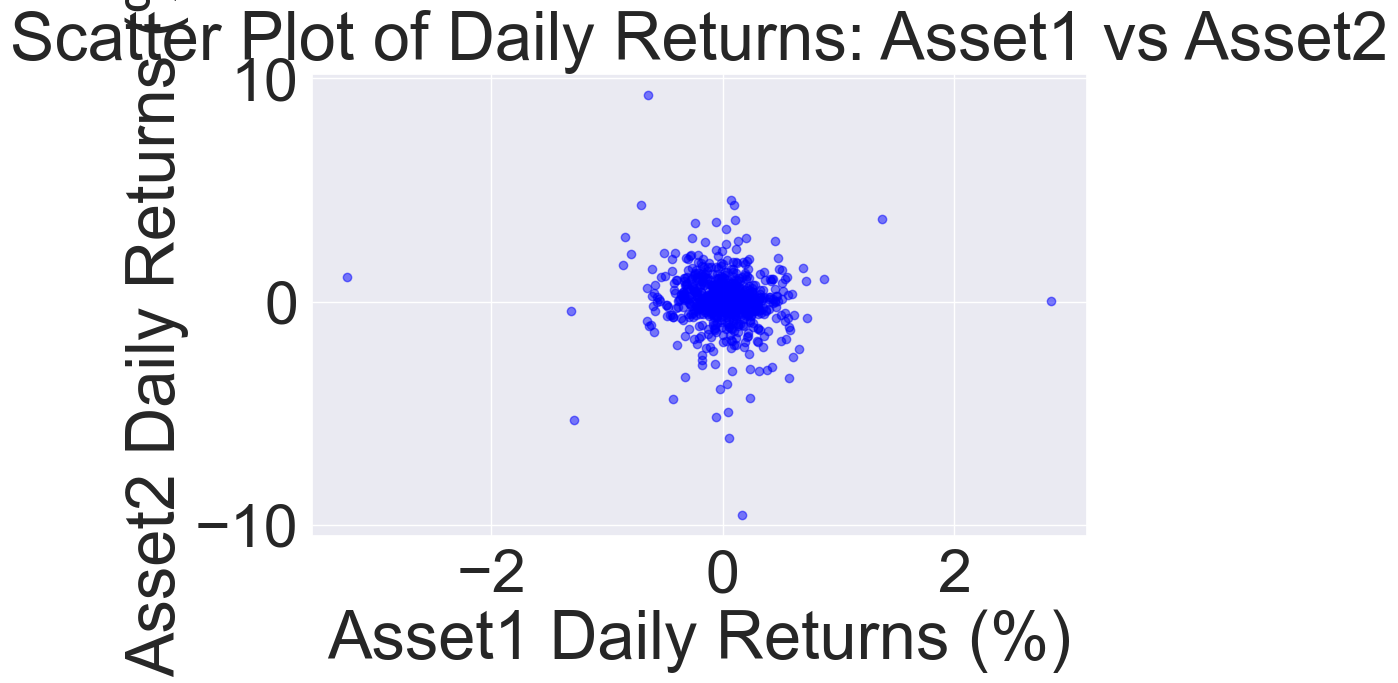

In [614]:
asset_x="Asset1"
asset_y="Asset2"
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(daily_returns[asset_x], daily_returns[asset_y], alpha=0.5, color='blue')

# Add titles and labels
plt.title(f'Scatter Plot of Daily Returns: {asset_x} vs {asset_y}')
plt.xlabel(f'{asset_x} Daily Returns (%)')
plt.ylabel(f'{asset_y} Daily Returns (%)')
plt.grid(True)

# Display the plot
plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [617]:
df2=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week4/tech-challenge/portfolio_weights.csv")

In [618]:
df2.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [619]:
df2["date"]=pd.to_datetime(df2["date"])

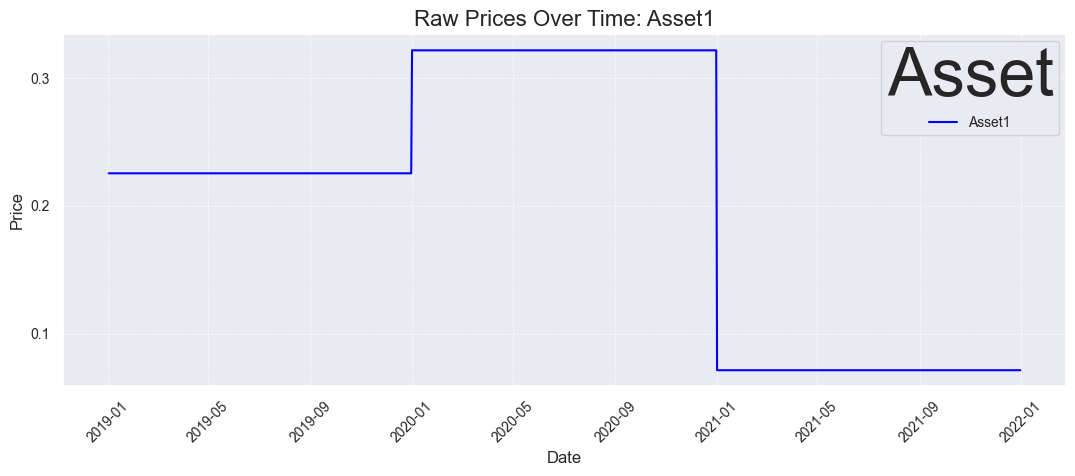

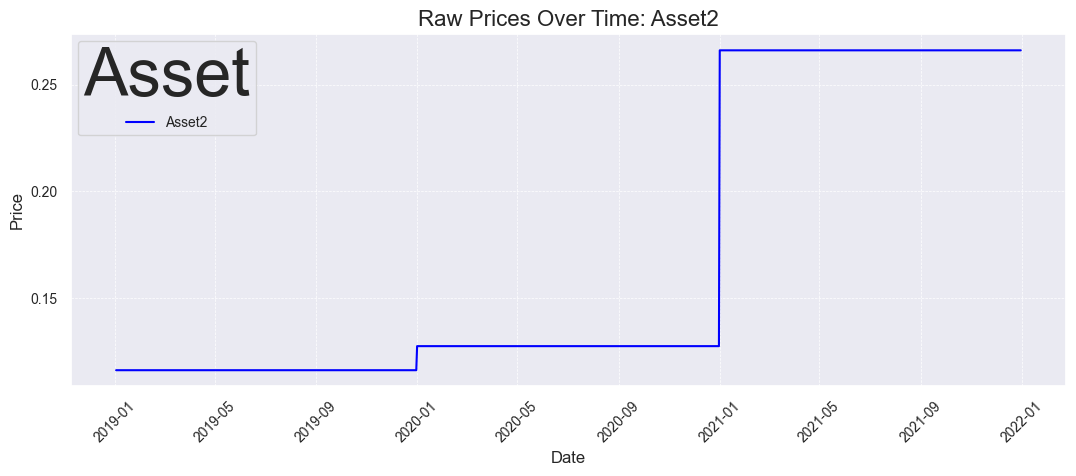

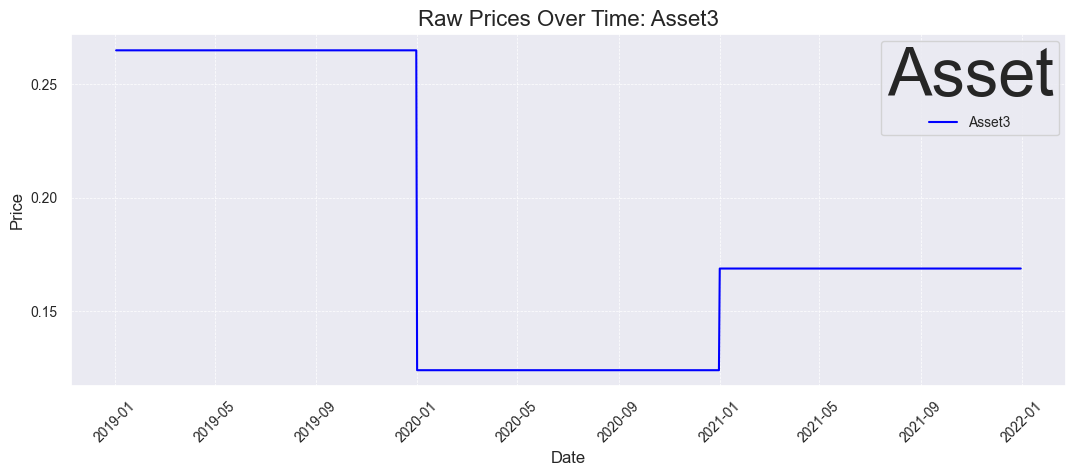

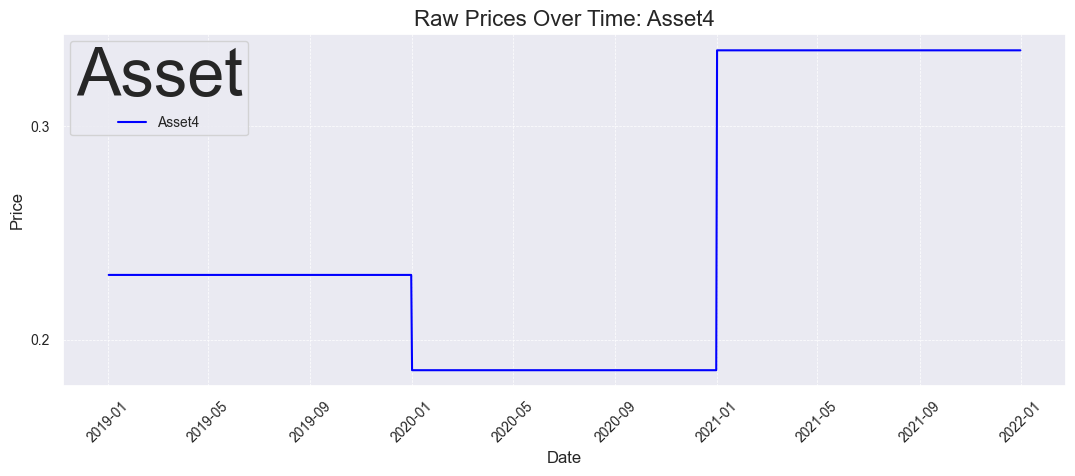

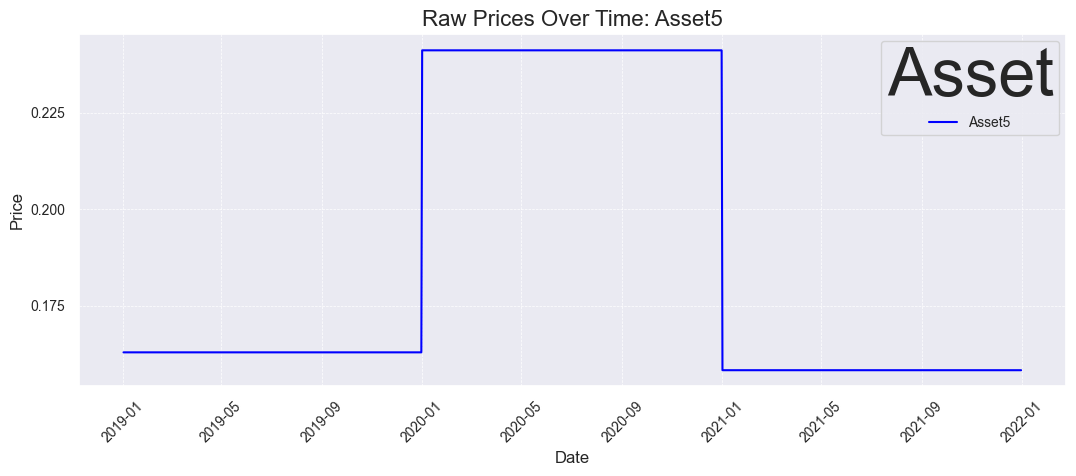

In [620]:
for column in df2.columns[1:]:  # Skip the 'date' column
    plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability
    plt.plot(df2['date'], df2[column], label=column, color='blue')
    plt.title(f'Raw Prices Over Time: {column}', fontsize=16)  # Larger font for title
    plt.xlabel('Date', fontsize=12)  # Larger font for x-axis label
    plt.ylabel('Price', fontsize=12)  # Larger font for y-axis label
    plt.legend(title='Asset', fontsize=10)
    plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels and adjust font size
    plt.yticks(fontsize=10)  # Adjust font size for y-axis ticks
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()  # Automatically adjust spacing to prevent overlap
    plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [622]:
daily_returns["date"]=df["date"]

In [623]:
merged_data = pd.merge(daily_returns, df2, on='date')

In [641]:
# Multiply daily returns by their respective weights
weighted_returns =  daily_returns.iloc[:, :5].values * df2.iloc[:, 1:].values

In [643]:
# Calculate the portfolio's daily return as the sum of weighted returns
portfolio_daily_returns = weighted_returns.sum(axis=1)

In [671]:
portfolio_daily_returns = pd.DataFrame(portfolio_daily_returns)

In [673]:
# Calculate cumulative returns
cumulative_returns = (1 + portfolio_daily_returns).cumprod()

In [675]:
print(portfolio_daily_returns.describe())

                0
count  782.000000
mean     0.043118
std      0.526920
min     -4.099008
25%     -0.132576
50%      0.053242
75%      0.288256
max      2.967182


In [677]:
daily_returns

,Asset1,Asset2,Asset3,Asset4,Asset5,date
0,NaN,NaN,NaN,NaN,NaN,2019-01-02
1,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211,2019-01-03
2,-0.273984,2.095422,2.525524,-0.112542,1.924221,2019-01-04
3,-0.151170,1.263162,-0.733753,0.185572,1.479175,2019-01-07
4,-0.153486,0.100285,0.703977,0.360533,-0.019179,2019-01-08
...,...,...,...,...,...,...
778,-0.091306,0.738415,0.543901,0.000000,1.344319,2021-12-27
779,0.006442,0.548309,0.759918,0.000000,-0.114106,2021-12-28
780,-0.486243,-0.158812,-0.664707,0.017523,-0.314151,2021-12-29
781,-0.069556,0.290341,0.334577,0.026280,0.143246,2021-12-30


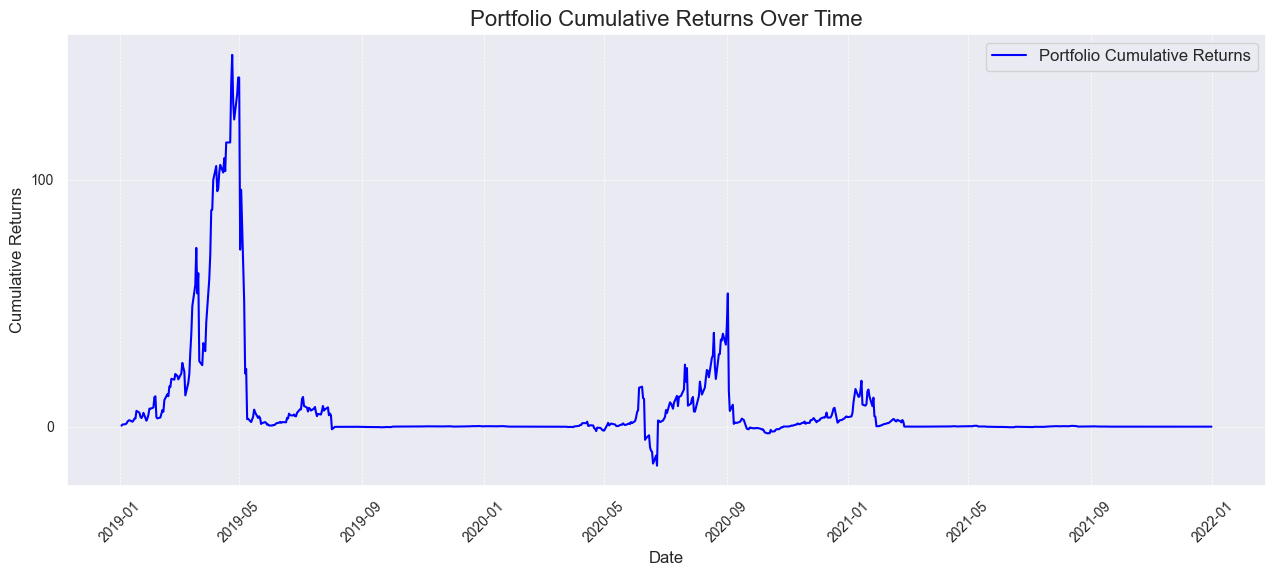

In [679]:
plt.figure(figsize=(14, 7))

# Asegúrate de alinear correctamente fechas y rendimientos acumulados
plt.plot(merged_data['date'], cumulative_returns, label='Portfolio Cumulative Returns', color='blue')

# Mejoras al gráfico
plt.title('Portfolio Cumulative Returns Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajustar tamaño de fuente en el eje Y
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()  # Ajustar los márgenes automáticamente
plt.show()

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [681]:
cumulative_returns

,0
0,NaN
1,0.400252
2,0.856051
3,1.029081
4,1.279682
...,...
778,0.000623
779,0.000782
780,0.000600
781,0.000696


In [683]:
days=365
# Calculate the total days
total_days = len(portfolio_daily_returns)

# Calculate the cumulative return (final value of cumulative_returns)
final_cumulative_return = cumulative_returns.iloc[-1]

# Calculate the annualized return
annualized_return = (final_cumulative_return ** (days / total_days)) - 1

In [669]:
print(f"Annualized Return: {annualized_return:.100%}")

Annualized Return: -96.8260225790254338562590419314801692962646484375000000000000000000000000000000000000000000000000000000%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [693]:
type(portfolio_daily_returns.std())

pandas.core.series.Series

In [695]:

# Calcula la desviación estándar de los rendimientos diarios del portafolio
daily_volatility = float(portfolio_daily_returns.std())

# Calcula la volatilidad anualizada
annualized_volatility = daily_volatility * (days ** 0.5)

print(f"Annualized Volatility: {annualized_volatility:.2%}")

Annualized Volatility: 1006.68%


C:\Users\igara\AppData\Local\Temp\ipykernel_16204\3550675775.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  daily_volatility = float(portfolio_daily_returns.std())


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [697]:
df3=pd.read_csv("C:/Users/igara/Ironhack Bootcamp/Bootcamp ironhack week4/tech-challenge/asset_information_data.csv")

In [717]:
weights_df = pd.melt(df2, id_vars="date", var_name="Name", value_name="Weight")
weights_df

,date,Name,Weight
0,2019-01-02,Asset1,0.225458
1,2019-01-03,Asset1,0.225458
2,2019-01-04,Asset1,0.225458
3,2019-01-07,Asset1,0.225458
4,2019-01-08,Asset1,0.225458
...,...,...,...
3910,2021-12-27,Asset5,0.158356
3911,2021-12-28,Asset5,0.158356
3912,2021-12-29,Asset5,0.158356
3913,2021-12-30,Asset5,0.158356


In [705]:
df3

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [729]:
merged_family

,Name,Family,date,Weight
0,Asset1,Fixed Income,2019-01-02,0.225458
1,Asset1,Fixed Income,2019-01-03,0.225458
2,Asset1,Fixed Income,2019-01-04,0.225458
3,Asset1,Fixed Income,2019-01-07,0.225458
4,Asset1,Fixed Income,2019-01-08,0.225458
...,...,...,...,...
3910,Asset5,Alternative,2021-12-27,0.158356
3911,Asset5,Alternative,2021-12-28,0.158356
3912,Asset5,Alternative,2021-12-29,0.158356
3913,Asset5,Alternative,2021-12-30,0.158356


In [757]:
merged_family=pd.merge(df3, weights_df, on="Name")

In [761]:
grouped_by_family=merged_family.groupby("Family")["Weight"].sum().reset_index()

In [763]:
grouped_by_family.head()

,Family,Weight
0,Alternative,146.868277
1,Equity,341.514233
2,Fixed Income,294.617490
